In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  #Colab compatibility

image_path = "img.png"
image = cv2.imread(image_path)

# 1.1
new_size = (1000, 1200)

# 1.1.1 Linear Interpolation
resized_linear = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)

# 1.1.2 Nearest Neighbors
resized_nearest = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)

# 1.1.3 Polynomial (Using Cubic Interpolation)
resized_cubic = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)

cv2_imshow(image)  # Original
cv2_imshow(resized_linear)
cv2_imshow(resized_nearest)
cv2_imshow(resized_cubic)


Output hidden; open in https://colab.research.google.com to view.

In [11]:
# 1.2
# 1.2.1 Box Blurring
box_blur = cv2.blur(image, (7, 7))

# 1.2.2 Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (7, 7), 0)

# 1.2.3 Adaptive Blurring
adaptive_blur = adaptive_blur = cv2.medianBlur(image, 7)

cv2_imshow(image)  # Original
cv2_imshow(box_blur)
cv2_imshow(gaussian_blur)
cv2_imshow(adaptive_blur)

Output hidden; open in https://colab.research.google.com to view.


SVM Model Performance:
Accuracy: 0.8806
Precision: 0.8875
Recall: 0.8797
F1-Score: 0.8787


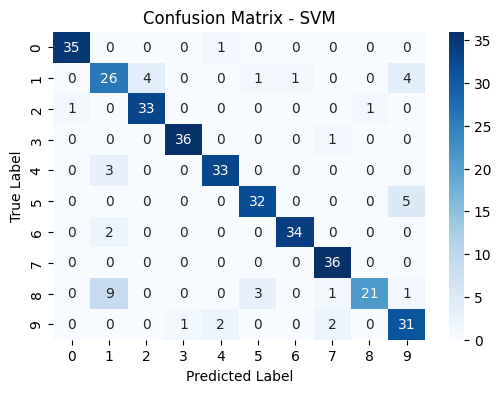

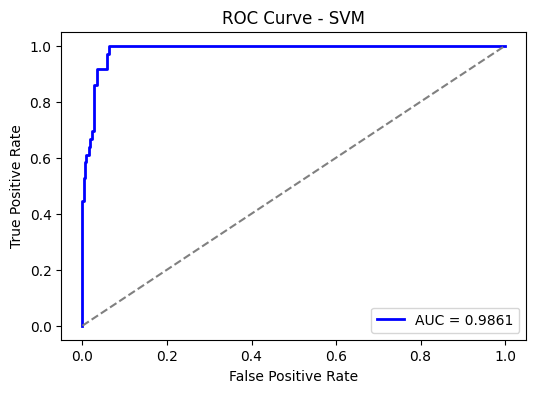

SVM AUC Score: 0.9861

Decision Tree Model Performance:
Accuracy: 0.8222
Precision: 0.8211
Recall: 0.8215
F1-Score: 0.8205


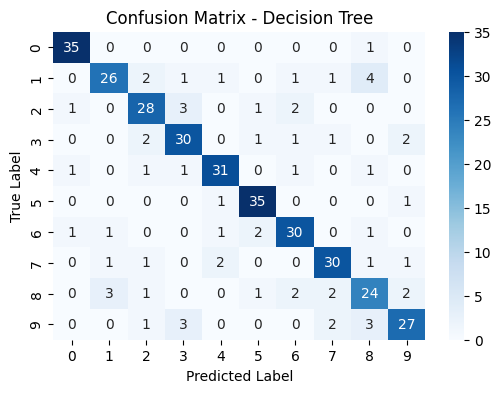

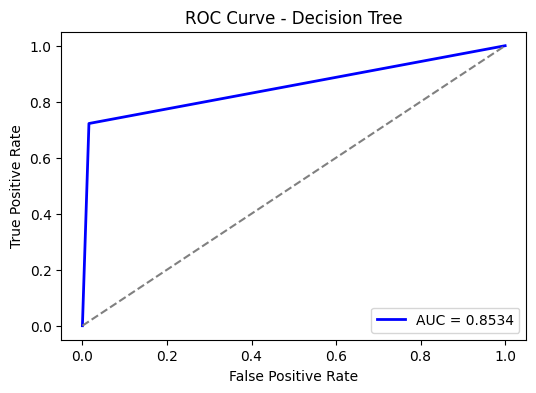

Decision Tree AUC Score: 0.8534


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc
)

digits = datasets.load_digits()

X = digits.data
y = digits.target

X = X / 255.0

# 2.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2.2.1 Support Vector Machine (SVM)
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 2.2.2 Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 2.3 Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="macro")
    recall = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # CM Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return accuracy, precision, recall, f1

# 2.3.6 ROC Curve & 2.3.7 AUC Score
def plot_roc_auc(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

    print(f"{model_name} AUC Score: {roc_auc:.4f}")

evaluate_model(y_test, y_pred_svm, "SVM")
plot_roc_auc(svm_model, X_test, y_test, "SVM")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
plot_roc_auc(dt_model, X_test, y_test, "Decision Tree")



AdaBoost Model Performance:
Accuracy: 0.7278
Precision: 0.7336
Recall: 0.7264
F1-Score: 0.7197


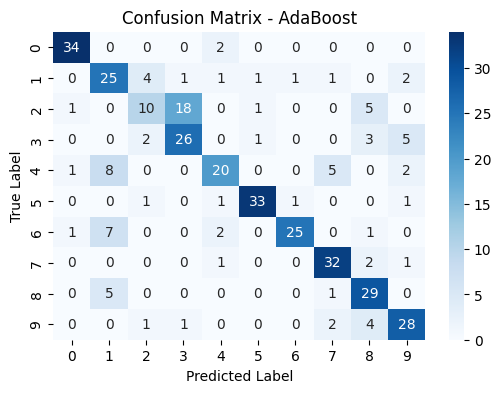

(0.7277777777777777,
 0.7336108186585387,
 0.7264435864435864,
 0.7197349045232673)

In [11]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost Model (Base Estimator: Decision Tree)
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="macro")
    recall = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return accuracy, precision, recall, f1

# ROC Curve and AUC Score
def plot_roc_auc(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

    print(f"{model_name} AUC Score: {roc_auc:.4f}")

# Evaluate all models
evaluate_model(y_test, y_pred_adaboost, "AdaBoost")